# Machine Learning and Statistics for Physicists

Material for a [UC Irvine](https://uci.edu/) course offered by the [Department of Physics and Astronomy](https://www.physics.uci.edu/).

Content is maintained on [github](github.com/dkirkby/MachineLearningStatistics) and distributed under a [BSD3 license](https://opensource.org/licenses/BSD-3-Clause).

##### &#9658; [View table of contents](Contents.ipynb)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

## Tensor Computing

Most practical algorithms of ML can be decomposed into small steps where the calculations are expressed with linear algebra, i.e., linear combinations of scalars, vectors and matrices.

For example, a neural network can be built from layers that each calculate
$$
\mathbf{x}_\text{out} = \max(0, W \mathbf{x}_\text{in} + \mathbf{b}) \; ,
$$
where $W$ is a matrix, and boldface symbols represent vectors. In typical applications, $\mathbf{x}_\text{out}$ and $\mathbf{x}_\text{in}$ are derived from **data** while $W$ and $\mathbf{b}$ are considered **model parameters**. (This expression is not strictly linear: why?)

The python numeric and list types can represent arbitrary scalars, vectors, and matrices, but are designed for flexibility instead of efficiency.

Numpy is instead optimized for the special case where all list elements are numeric values of the same type, which can be organized and accessed very efficiently in memory, with a specialized array type with lots of nice features. One downside of this approach is that most of builtin math functions are duplicated (e.g., `math.sin` and `np.sin`) to work with numpy arrays.

**EXERCISE:** Complete the function below using numpy to evaluate the neural-network layer defined above:

In [4]:
def xout(W, xin, b):
    return np.maximum(0, W.dot(xin) + b)
#maximum takes two vectors and will component-wise find the maximum
#max looks at all the numbers and finds the scalar max.

### Terminology

We frequently use $\mathbf{r} = (x, y, z)$ in physics to represent an *arbitrary* position in three (continuous) dimensions.

In numpy, we cannot represent an *arbitrary* position but can easily represent a *specific* position, for example:

In [5]:
rvec = np.array([0.1, -0.2, 0.3])

However, `rvec` has only one (discrete) dimension, which we use to access its three array elements with indices 0,1,2:

In [6]:
rvec[0], rvec[1], rvec[2]

(0.1, -0.2, 0.3)

Note how we use the term **dimension** differently in these two cases!

All numpy arrays have a `shape` property that specifies the range of indices allowed for each of their (discrete) dimensions:

In [7]:
rvec.shape

(3,)

In [8]:
rvec.ndim

1

Compare with a matrix represented in numpy:

In [9]:
matrix = np.identity(3)
print(matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [10]:
matrix[1, 0], matrix[1, 1]

(0.0, 1.0)

In [11]:
matrix.shape

(3, 3)

In [12]:
matrix.ndim

2

Numpy supports arrays with any (finite) number of (discrete) dimensions. The general name for these arrays is a **tensor** (so, scalars, vectors and matrices are tensors). For example:

In [13]:
tensor = np.ones((2, 3, 4))
print(tensor)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


In [14]:
tensor[0, 0, 0], tensor[1, 2, 3]

(1.0, 1.0)

In [15]:
tensor.shape

(2, 3, 4)

In [16]:
tensor.ndim

3

Tensors are used in physics also: for example, the tensor expression $g^{il} \Gamma^m_{ki} x^k$ arises in [contravariant derivatives in General Relativity](https://en.wikipedia.org/wiki/Christoffel_symbols#Covariant_derivatives_of_tensors). What are the **dimensions** of $g$, $\Gamma$ and $x$ in this expression?  Note that numpy tensors do not make any distinction between upper or lower indices.

The numpy dimension is sometimes also referred to as the **rank**, but note that [array rank](https://en.wikipedia.org/wiki/Rank_(computer_programming)) is similar to but subtly different from [linear algebra rank](https://en.wikipedia.org/wiki/Rank_(linear_algebra)).

### Fundamental Operations

#### Tensor Creation

The most common ways you will create new arrays are:
- Filled with a simple sequence of constant values
- Filled with (reproducible) random values
- Calculated as a mathematical function of existing arrays.

In [17]:
# Regular sequence of values
shape = (3, 4)
c1 = np.zeros(shape)
c2 = np.ones(shape)
c3 = np.full(shape, -1)
c4 = np.arange(12)

In [18]:
# Reproducible "random" numbers
gen = np.random.RandomState(seed=123)
r1 = gen.uniform(size=shape)
r2 = gen.normal(loc=-1, scale=2, size=shape)

In [19]:
# Calculated as function of existing array.
f1 = r1 * np.sin(r2) ** c3

All the values contained within a tensors have the same [data type](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.types.html), which you can inspect:

In [20]:
c1.dtype, c4.dtype

(dtype('float64'), dtype('int64'))

**EXERCISE:** Try to guess the `dtype` of `c3`, `r2` and `f1`, then check your answer.  Deep learning often uses smaller (32 or 16 bit) float data types: what advantages and disadvantages might this have?

In [21]:
print(c3.dtype=='int')
print(r2.dtype=='float')
print(f1.dtype=='float')

True
True
True


<span style="color:blue">
GPUs have a special memory architecture that is expensive, so we ARE memory constrained.
<br/><br/>
Also, by making the data more coarse, we can insert some stochasticity, the usefulness of which the lecture slides point to.
</span>

**SOLUTION:** The `zeros` and `ones` functions default to `float64`, but `full` uses the type of the provided constant value. Integers are automatically promoted to floats in mixed expressions.

In [22]:
c3.dtype, r2.dtype, f1.dtype

(dtype('int64'), dtype('float64'), dtype('float64'))

Smaller floats allow more efficient use of limited (GPU) memory and faster calculations, at the cost of some accuracy. Since the training of a deep neural network is inherently noisy, this is generally a good tradeoff.

#### Tensor Reshaping

It is often useful to [reshape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.reshape.html) a tensor without changing its total size, which can be done very efficiently since the layout of the tensor values in memory does not need to be changed:

In [23]:
c4.reshape(c1.shape)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

**EXERCISE:** Predict the result of `c4.reshape(2, 3, 2)` then check your answer.

In [24]:
c4.reshape(2, 3, 2)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

#### Tensor Broadcasting

The real power of tensor computing comes from expressions like this:

In [25]:
# Add one to each element.
c4 + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [26]:
# Scale each column of the 3x4 ones matrix by a different value.
np.ones(shape=(3, 4)) * np.arange(4)

array([[0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.]])

The results are not surprising in these examples, but something non-trivial is going on behind the scenes to make this work since we are combining tensors with different shapes. This is called [broadcasting](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.broadcasting.html) and has specific rules for how to handle less obvious cases.

Broadcasting serves two purposes:
 - It allows more compact and easier to understand "vectorized" expressions, where loops over elements in each dimension are implicit.
 - It enables automatic optimizations to take advantage of the available hardware, since explicit python loops are generally a bottleneck.
 
Not all expressions can be automatically broadcast, even if they seem to make sense.  For example:

In [27]:
# Scale each row of the 3x4 ones matrix by a different value.
try:
    np.ones(shape=(3, 4)) * np.arange(3)
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (3,4) (3,) 


However, you can usually reshape the inputs to get the desired result:

In [28]:
np.ones(shape=(3, 4)) * np.arange(3).reshape(3, 1)

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.]])

Another useful trick is to use `keepdims=True` with reducing functions, e.g.

In [29]:
print(np.ones((4, 3)).sum(axis=1))
print(np.ones((4, 3)).sum(axis=1, keepdims=True))

[3. 3. 3. 3.]
[[3.]
 [3.]
 [3.]
 [3.]]


To experiment with broadcasting rules, define a function to try broadcasting two arbitrary tensor shapes:

In [30]:
def broadcast(shape1, shape2):
    array1 = np.ones(shape1)
    array2 = np.ones(shape2)
    try:
        array12 = array1 + array2
        print('shapes {} {} broadcast to {}'.format(shape1, shape2, array12.shape))
    except ValueError as e:
        print(e)

In [31]:
broadcast((1, 3), (3,))

shapes (1, 3) (3,) broadcast to (1, 3)


In [32]:
broadcast((1, 2), (3,))

operands could not be broadcast together with shapes (1,2) (3,) 


**EXERCISE:** Predict the results of the following then check your answers:
```
broadcast((3, 1, 2), (3, 2))
broadcast((2, 1, 3), (3, 2))
broadcast((3,), (2, 1))
broadcast((3,), (1, 2))
broadcast((3,), (1, 3))
```

In [33]:
broadcast((3, 1, 2), (3, 2))
broadcast((2, 1, 3), (3, 2))
broadcast((3,), (2, 1))
broadcast((3,), (1, 2))
broadcast((3,), (1, 3))

shapes (3, 1, 2) (3, 2) broadcast to (3, 3, 2)
operands could not be broadcast together with shapes (2,1,3) (3,2) 
shapes (3,) (2, 1) broadcast to (2, 3)
operands could not be broadcast together with shapes (3,) (1,2) 
shapes (3,) (1, 3) broadcast to (1, 3)


### Tensor Frameworks

#### Numpy

Numpy is an example of a framework for tensor computing that is widely supported and requires no special hardware. However, it still offers significant performance improvements by eliminating explicit python loops and using memory efficiently.

For example, let's calculate the opening angle separation between two unit vectors, each specified with (lat, lon) angles in radians (or RA,DEC for astronomers, as implemented [here](https://desisurvey.readthedocs.io/en/latest/api.html#desisurvey.utils.separation_matrix)). The [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula) is a good way to calculate this quantity.

Generate a large number of random unit vectors for benchmarking (are these uniformly distributed on the sphere?)

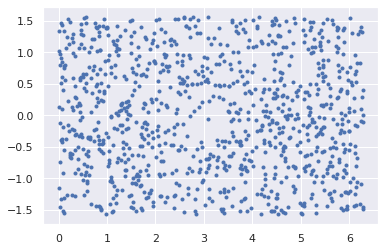

In [34]:
def generate(N, seed=123):
    gen = np.random.RandomState(seed=123)
    lats = gen.uniform(low=-np.pi / 2, high=+np.pi / 2, size=N)
    lons = gen.uniform(low=0, high=2 * np.pi, size=N)
    plt.plot(lons, lats, '.')
    return lats, lons

lats, lons = generate(N=1000)

In [35]:
lats.shape

(1000,)

Use explicit python loops to calculate the (square) matrix of separation angles between all pairs of unit vectors:

In [36]:
def separation_matrix_loops():
    # Allocate memory for the matrix.
    N = len(lats)
    matrix = np.empty((N, N))
    for i, (lat1, lon1) in enumerate(zip(lats, lons)):
        for j, (lat2, lon2) in enumerate(zip(lats, lons)):
            # Evaluate the Haversine formula for matrix element [i, j].
            matrix[i, j] = 2 * np.arcsin(np.sqrt(
                np.sin(0.5 * (lat2 - lat1)) ** 2 +
                np.cos(lat1) * np.cos(lat2) * np.sin(0.5 * (lon2 - lon1)) ** 2))
    return matrix

In [37]:
%time S1 = separation_matrix_loops()

CPU times: user 10 s, sys: 67.4 ms, total: 10.1 s
Wall time: 10.3 s


Now calculate the same separations using numpy implicit loops:

In [42]:
def separation_matrix_numpy():
    lat1, lat2 = lats, lats.reshape(-1, 1)
    lon1, lon2 = lons, lons.reshape(-1, 1)
    return 2 * np.arcsin(np.sqrt(
        np.sin(0.5 * (lat2 - lat1)) ** 2 +
        np.cos(lat1) * np.cos(lat2) * np.sin(0.5 * (lon2 - lon1)) ** 2))

Check that both calculations give the same results:

In [43]:
np.allclose(S1, S2)

True

Since this is so much faster, increase the amount of computation (and memory) 100x for a better benchmark:

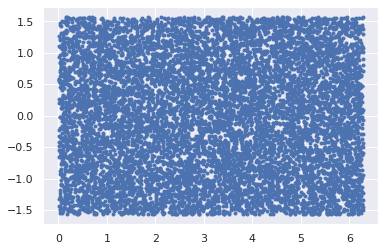

In [44]:
lats, lons = generate(N=10000)

In [45]:
%time S2 = separation_matrix_numpy()

CPU times: user 9.21 s, sys: 516 ms, total: 9.73 s
Wall time: 9.87 s


Therefore using implicit numpy loops speeds up the calculation by a factor of about 6.8 / 0.02 = 340. Since we are using the efficient numpy arrays in both cases, the speed up is entirely due to the loops!

#### Other Frameworks: PyTorch and TensorFlow

Machine learning relies heavily on frameworks that copy the successful numpy design for tensor computing, while adding some important new features:
 - Automatic hardware acceleration.
 - Automatic calculation of derivatives.
 - Efficient deployment to other platforms (mobile, cloud).
 
Unlike numpy, the default type in these frameworks is usually a 32-bit float, rather than a 64-bit float.

The two most popular tensor computing frameworks for machine learning today are [PyTorch](https://pytorch.org/) and [TensorFlow](https://www.tensorflow.org/). Both are large open-source projects, primarily developed by facebook (pytorch) and google (tensorflow). These frameworks were originally quite different, with pytorch preferred for research and tensorflow preferred for large-scale deployment, but they are gradually converging towards similar a feature set.

Below, we repeat our calculation of the separation matrix with both of these frameworks. You will notice that the new features come with some additional complexity.

#### PyTorch Example

In [47]:
import torch

In [48]:
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
print(f'Using device: {device}.')
lons_pt = torch.tensor(lons, device=device)
lats_pt = torch.tensor(lats, device=device)

Using device: cpu.


/home/patrick/envs/mls/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [49]:
def separation_matrix_torch():
    lat1, lat2 = lats_pt, lats_pt.reshape(-1, 1)
    lon1, lon2 = lons_pt, lons_pt.reshape(-1, 1)
    return 2 * torch.asin(torch.sqrt(
        torch.sin(0.5 * (lat2 - lat1)) ** 2 +
        torch.cos(lat1) * torch.cos(lat2) * torch.sin(0.5 * (lon2 - lon1)) ** 2))

In [50]:
%time S3 = separation_matrix_torch()

CPU times: user 5.25 s, sys: 4.56 s, total: 9.82 s
Wall time: 5.31 s


In [51]:
np.allclose(S2, S3.numpy())

True

#### TensorFlow Example

In [53]:
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [54]:
device = 'GPU:0' if tf.config.list_physical_devices('GPU') else 'CPU:0'
print(f'Using device: {device}.')
with tf.device(device):
    lons_tf = tf.constant(lons)
    lats_tf = tf.constant(lats)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Using device: CPU:0.


In [47]:
def separation_matrix_tensorflow():
    lat1, lat2 = lats_tf, tf.reshape(lats_tf, [-1, 1])
    lon1, lon2 = lons_tf, tf.reshape(lons_tf, [-1, 1])
    return 2 * tf.asin(tf.sqrt(
        tf.sin(0.5 * (lat2 - lat1)) ** 2 +
        tf.cos(lat1) * tf.cos(lat2) * tf.sin(0.5 * (lon2 - lon1)) ** 2))

In [48]:
%time S4 = separation_matrix_tensorflow()

CPU times: user 20.4 s, sys: 9.31 s, total: 29.7 s
Wall time: 3.54 s


In [49]:
np.allclose(S2, S4.numpy())

True

#### Hardware Acceleration

Tensor computing can be sped up significantly (10-100x) using hardware that is optimized to perform tensor computing by distributing simple calculations ("kernels") across many independent processors ("cores") running in parallel.

The original driver for such hardware was to accelerate the 3D geometry calculations required to render real time 3D graphics, leading to the first [Graphics Processing Units (GPUs)](https://en.wikipedia.org/wiki/Graphics_processing_unit) in the 1990s.  More recently, GPUs have been adopted for purely numerical calculations, with no display attached, leading to the development of specialized programming languages such as [CUDA](https://en.wikipedia.org/wiki/CUDA) and [OpenCL](https://en.wikipedia.org/wiki/OpenCL).

Currently, one vendor (Nvidia) dominates the use of GPUs for ML with its proprietary CUDA language.  Google has also introduced an even more specialized [TPU](https://en.wikipedia.org/wiki/Tensor_processing_unit) architecture.

The table below shows some benchmarks for the separation matrix problem, running on different hardware with different frameworks.  The speed ups obtained using PyTorch and TensorFlow with a GPU are typical. The two frameworks provide comparable GPU performance overall, but can differ on specific problems.


| Test       | Laptop |Server(GPU) | Collab(CPU) | Collab(GPU) |
|------------|--------|------------|-------------|-------------|
| numpy      | 2.08s  | 1.17s      | 10.5s       | 10.3s       |
| torch      | 7.32s  | 48.7ms     | ---         | ---         |
| tensorflow | ---    | ---        | 9.11s       | 246ms       | 
| ratio      | 3.5    | 1 / 24     | 0.87        | 1 / 41      |

To benefit from this hardware, you can either add a GPU to a linux server, or use a cloud computing platform.

Cloud computing is the easiest way to get started.  There are some free options, but generally you have to "pay as you go" to do a useful amount of work. Some good starting points are:
 - [Google Collaboratory](https://colab.research.google.com/): free research tool with a jupyter notebook front end.
 - [PaperSpace](https://www.paperspace.com/): reasonably priced and simple to get started.
 - [Amazon Web Services](https://aws.amazon.com/ec2/): free to try, very flexible and relatively complex.
 - [Google Cloud](https://cloud.google.com/): comparable to AWS.
 
**Note: this is not a complete list, and pricing and capabilities are rapidly changing.**

If you are considering building your own GPU server, start [here](http://timdettmers.com/2018/11/05/which-gpu-for-deep-learning/). A single server can host 4 GPUs. Here is a single water-cooled [RTX 2080 Ti](https://www.nvidia.com/en-us/geforce/graphics-cards/rtx-2080-ti/) GPU installed in my office:

![GPU server](img/TensorComputing/GPU-server.jpg)

### Automatic Derivatives

In addition to hardware acceleration, a key feature of tensor computing frameworks for ML is their ability to automate the calculation of derivatives, which then enable efficient and accurate gradient-based optimization algorithms.

In general, a derivate can be implemented in software three ways:
 - Analytically (using paper or mathematica) then copied into code: this is the most efficient and accurate but least generalizable.
 - Numerically, with [finite difference equations](https://en.wikipedia.org/wiki/Finite_difference): this is the least efficient and accurate, but most generalizable.
 - [Automatically](https://en.wikipedia.org/wiki/Automatic_differentiation): a hybrid approach where a small set of primitive functions (sin, cos, log, ...) are handled analytically, then the derivatives of expressions using these primitives are computed on the fly using the chain rule, product rule, etc. This is efficient and accurate, but requires that expressions are built entirely from primitives that support AD.

As a concrete example calculate the (un-normalized) Gaussian distribution
$$
y(x) = e^{-x^2}
$$
in PyTorch:

In [55]:
x = torch.linspace(-5, 5, 20, requires_grad=True)
y = torch.exp(-x ** 2)

In [56]:
x

tensor([-5.0000, -4.4737, -3.9474, -3.4211, -2.8947, -2.3684, -1.8421, -1.3158,
        -0.7895, -0.2632,  0.2632,  0.7895,  1.3158,  1.8421,  2.3684,  2.8947,
         3.4211,  3.9474,  4.4737,  5.0000], requires_grad=True)

In [51]:
y

tensor([1.3888e-11, 2.0328e-09, 1.7098e-07, 8.2640e-06, 2.2952e-04, 3.6632e-03,
        3.3596e-02, 1.7705e-01, 5.3619e-01, 9.3309e-01, 9.3309e-01, 5.3619e-01,
        1.7705e-01, 3.3596e-02, 3.6632e-03, 2.2952e-04, 8.2640e-06, 1.7098e-07,
        2.0328e-09, 1.3888e-11], grad_fn=<ExpBackward>)

We specify `requires_grad=True` to enable AD for all tensors that depend on `x` (so just `y` in this case). To calculate partial derivatives ("gradients") of `y` wrt `x`, use:

In [52]:
y.backward(torch.ones_like(y))

The tensor `x.grad` now contains $y'(x)$ at each value of `x`:

In [53]:
x.grad

tensor([ 1.3888e-10,  1.8188e-08,  1.3498e-06,  5.6543e-05,  1.3288e-03,
         1.7352e-02,  1.2377e-01,  4.6593e-01,  8.4661e-01,  4.9110e-01,
        -4.9110e-01, -8.4661e-01, -4.6593e-01, -1.2377e-01, -1.7352e-02,
        -1.3288e-03, -5.6543e-05, -1.3498e-06, -1.8188e-08, -1.3888e-10])

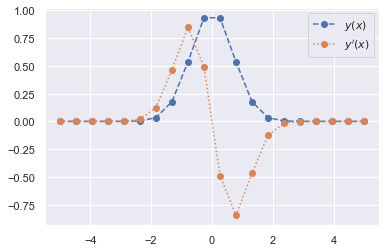

In [54]:
x_n = x.detach().numpy()
yp_n = x.grad.detach().numpy()
y_n = y.detach().numpy()
plt.plot(x_n, y_n, 'o--', label='$y(x)$')
plt.plot(x_n, yp_n, 'o:', label='$y^\prime(x)$')
plt.legend();

Note that these derivatives are calculated to full machine precision and not affected by the coarse spacing in $x$.

[Jax](https://github.com/google/jax) is a relatively new framework for automatic differentiation (developed by google but independent of tensorflow) that relies on "just-in-time" compilation and is designed for ML research.

### Higher-Level APIs for Tensor Computing

Although TensorFlow and PyTorch are both similar to numpy, they have different APIs so you are forced to choose one to take advantage of their unique features.  However, for many calculations they are interchangeable, and a new ecosystem of higher-level APIs is growing to support this.  For example, check out:
 - [Tensorly](http://tensorly.org/stable/index.html): "*Tensor learning in python*". Includes powerful [decomposition](https://arxiv.org/abs/1711.10781) (generalized PCA) and regression algorithms.
 - [einops](https://github.com/arogozhnikov/einops): "*Deep learning operations reinvented*". Supports compact expressions for complex indexing operations ([np.einsum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.einsum.html) on steroids).
 
Neither of these packages are included in the MLS conda environment, but I encourage you to experiment with them if you want to write framework-independent tensor code.